In [3]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import ast
import matplotlib.cm as cm
import numpy as np
from sklearn.preprocessing import MinMaxScaler




In [4]:
df1 = pd.read_csv("PrivacyPolicies_df_all_nona_linkcount.csv") # reading in link lists

for index, row in df1.iterrows():
    if type(df1.at[index, "all_links"]) == float:
        df1.at[index, 'all_links'] = [df1.at[index, "all_links"]]
    elif type(df1.at[index, "all_links"]) == str:
        df1.at[index, 'all_links'] = ast.literal_eval(df1.at[index, 'all_links'])
    else:
        continue




In [5]:
num_links = []

for index, row in df1.iterrows():
    list_of_links = df1.at[index, "all_links"]
    has_nan = any(pd.isna(item) for item in list_of_links)
    if has_nan and len(list_of_links) == 1:
        length = 0
        num_links.append(length)
    else:
        length = len(list_of_links)
        num_links.append(length)

df1.insert(0, 'link_count', num_links) # inserts link count column



In [8]:
newdf = df1.groupby(['year']).mean("link_count").reset_index() # updates link count column to reflect mean links for the year

# newdf.to_csv('counting_links_first_chunk.csv', index=True)

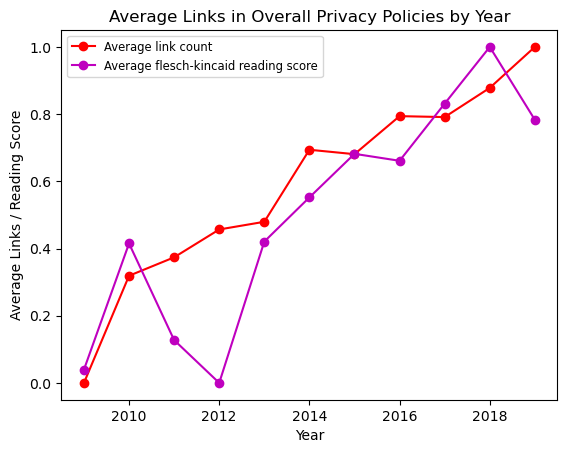

In [12]:
normalizationdf = pd.DataFrame({
    'link_count': newdf['link_count'],
    'flesch_kincaid': newdf['flesch_kincaid']
})

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(normalizationdf)
normalized_data2 = pd.DataFrame(normalized_data, columns = normalizationdf.columns)
year = newdf['year']
counts = normalized_data2['link_count']
scores = normalized_data2['flesch_kincaid']

plt.plot(year, counts, marker='o', linestyle= '-', color='r', label= 'Average link count')
plt.plot(year, scores, marker='o', linestyle= '-', color='m', label= 'Average flesch-kincaid reading score')

plt.title('Average Links in Overall Privacy Policies by Year')
plt.xlabel('Year')
plt.ylabel('Average Links / Reading Score')

# plt.ylim(global_min, global_max)

plt.legend(loc='upper left', fontsize='small')
plt.show()



ValueError: Expected 2D array, got 1D array instead:
array=[48.33999001 59.20907738 61.07857517 63.90450928 64.68260188 71.98901501
 71.54115191 75.39814815 75.3032491  78.26554622 82.41867955].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.